# Logistic Regression from Scratch
This notebook implements Logistic Regression using only NumPy. It covers:
- Generating synthetic classification data
- Normalizing features
- Implementing the sigmoid function
- Defining the binary cross-entropy loss
- Training with gradient descent
- Visualizing the loss curve

## 📊 Generate Synthetic Data
We generate a binary classification dataset using `make_classification` from `sklearn`.

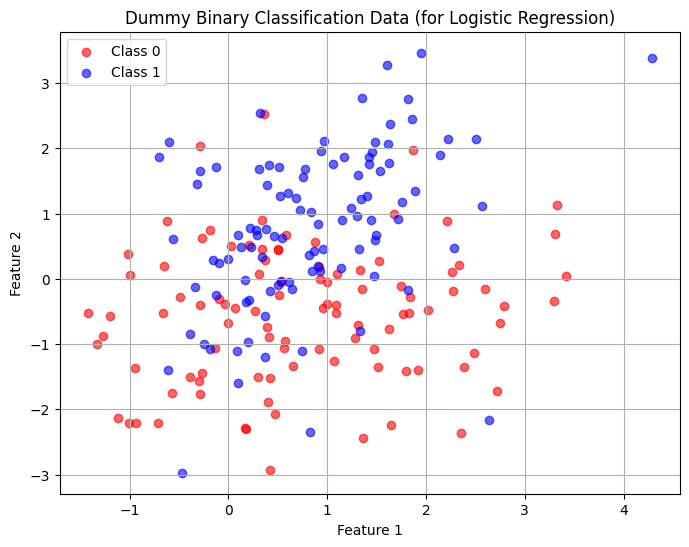

Features shape: (200, 2)
Target shape: (200,)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set seed
np.random.seed(42)

# Generate a classification dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,          # Only 2 useful features for visualization
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,         # Low separation makes it harder
    flip_y=0.1,            # Add noise (10% label flipping)
    random_state=42
)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
plt.title("Dummy Binary Classification Data (for Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

print("Features shape:", X.shape)
print("Target shape:", y.shape)

## 🔄 Normalize Features
We normalize input features to have mean 0 and unit variance.

(200, 1) (200, 1)
(200, 9)
[[ 0.20679471]
 [ 1.77054376]
 [-1.48957037]
 [ 0.12003918]
 [ 0.59274809]
 [ 0.20077838]
 [-0.13611578]
 [ 0.20077838]
 [-0.2049282 ]]
0.9195950677903825
0.48626907225856303


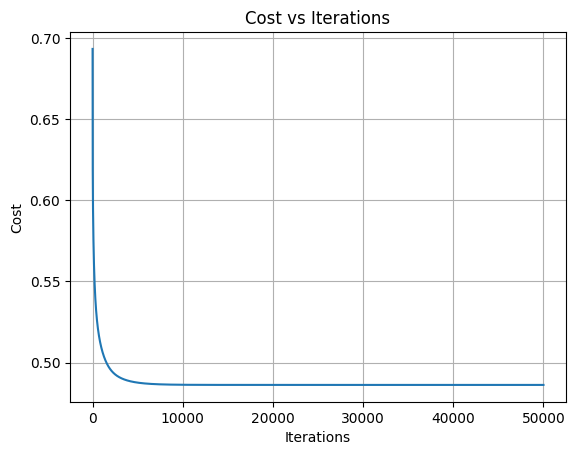

In [5]:
# Normalize input features
x_mean = np.mean(X)             # Compute mean of all features
x_std = np.std(X)               # Compute standard deviation of all features
x = (X - x_mean) / x_std        # Apply standard normalization

# Reshape labels to column vector
y = y.reshape(-1, 1)

# Extract individual features
x1 = x[:, 0].reshape(-1, 1)     # First feature
x2 = x[:, 1].reshape(-1, 1)     # Second feature

print(x1.shape, x2.shape)       # Confirm the shape of feature vectors

# Polynomial feature expansion for non-linear decision boundary
x1_2 = x1**2                    # x1 squared
x2_2 = x2**2                    # x2 squared
x3 = x1 * x2                    # x1 * x2 (interaction term)
x1_3 = x1**3                    # x1 cubed
x2_3 = x2**3                    # x2 cubed
x1_x2_2 = x1 * (x1**2)          # x1^3 again (alternate form)
x1_2_x2 = x2 * (x1**2)          # x1^2 * x2 (nonlinear interaction)

# Combine all features into final design matrix
x = np.hstack((x1, x2, x1_2, x2_2, x3, x1_3, x2_3, x1_x2_2, x1_2_x2))
print(x.shape)                  # Show the final shape of the input matrix

# Number of training examples
m = x.shape[0]

# Initialize weights and bias to zero
w = np.array([[0], [0], [0], [0], [0], [0], [0], [0], [0]])  # Shape: (9, 1)
b = 0

# Training hyperparameters
iteration = 50000              # Total iterations for gradient descent
cost = []                      # List to store cost at each step
alpha = 0.02                   # Learning rate

# Gradient Descent Loop
for i in range(iteration):
    z = x @ w + b                         # Linear combination of weights and inputs
    y_pred = 1 / (1 + np.exp(-z))        # Apply sigmoid to get predictions
    cst = -(1/m) * np.sum(               # Compute binary cross-entropy loss
        y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8)
    )
    cost.append(cst)                     # Store cost

    # Gradient computation and parameter update
    w = w - alpha * (1/m) * (x.T @ (y_pred - y))  # Update weights
    b = b - alpha * (1/m) * np.sum(y_pred - y)    # Update bias

# Print final model parameters and cost
print(w)                   # Final weights
print(b)                   # Final bias
print(cost[-1])            # Final cost

# Plot cost over iterations to visualize convergence
plt.plot(cost)
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


## 📈 Visualize Data
We visualize the dataset with different colors for each class.

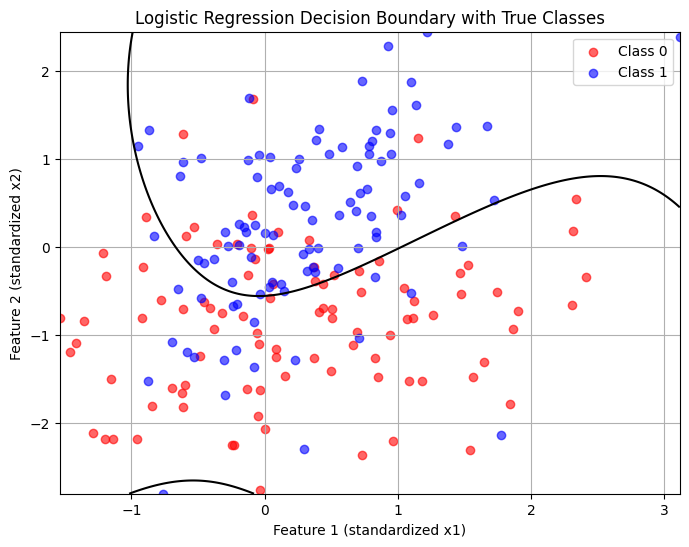

In [6]:
# 1. Plot the original data using true labels
plt.figure(figsize=(8, 6))
y = y.flatten()
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)

# 2. Create a meshgrid over the feature space
x1_min, x1_max = x1.min(), x1.max()
x2_min, x2_max = x2.min(), x2.max()
x1_vals = np.linspace(x1_min, x1_max, 300)
x2_vals = np.linspace(x2_min, x2_max, 300)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# 3. Flatten and generate the same polynomial features as during training
x1_flat = X1.ravel().reshape(-1, 1)
x2_flat = X2.ravel().reshape(-1, 1)
x1_2 = x1_flat ** 2
x2_2 = x2_flat ** 2
x3 = x1_flat * x2_flat
x1_3 = x1_flat ** 3
x2_3 = x2_flat ** 3
x1_x2_2 = x1_flat * (x1_flat ** 2)
x1_2_x2 = x2_flat * (x1_flat ** 2)
X_grid = np.hstack((x1_flat, x2_flat, x1_2, x2_2, x3, x1_3, x2_3, x1_x2_2, x1_2_x2))

# 4. Predict probabilities on the grid
z_grid = X_grid @ w + b
y_grid_pred = 1 / (1 + np.exp(-z_grid))
y_grid_pred = y_grid_pred.reshape(X1.shape)

# 5. Plot the decision boundary
plt.contour(X1, X2, y_grid_pred, levels=[0.5], colors='black')

# 6. Plot formatting
plt.title("Logistic Regression Decision Boundary with True Classes")
plt.xlabel("Feature 1 (standardized x1)")
plt.ylabel("Feature 2 (standardized x2)")
plt.legend()
plt.grid(True)
plt.show()